[[2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

enter number of neurons in first hidden layer:  16
enter number of neurons in second hidden layer:  16
enter number of neurons in third hidden layer:  16
enter number of neurons in fourth hidden layer:  16
enter number of neurons in fifth hidden layer:  16
enter floating point learning rate for stochastic gradient descent: 0.5
enter integer value for number of training epochs: 10000


1.4300778613664478 this is the categorical cross entropy loss
0 epochs completed
1.129971645538235 this is the categorical cross entropy loss
1 epochs completed
1.1116367726412977 this is the categorical cross entropy loss
2 epochs completed
1.102668288036307 this is the categorical cross entropy loss
3 epochs completed
1.100709323839426 this is the categorical cross entropy loss
4 epochs completed
1.100009584294531 this is the categorical cross entropy loss
5 epochs completed
1.1000120449185997 this is the categorical cross entropy loss
6 epochs completed
1.0997485456603608 this is the categorical cross entropy loss
7 epochs completed
1.0998622938470368 this is the categorical cross entropy loss
8 epochs completed
1.099629504324043 this is the categorical cross entropy loss
9 epochs completed
1.099732109424247 this is the categorical cross entropy loss
10 epochs completed
1.0995213196900546 this is the categorical cross entropy loss
11 epochs completed
1.0996051825602418 this is the c

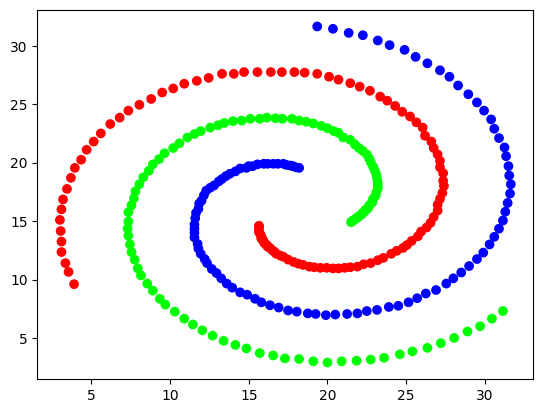

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d = pd.read_csv("3-spiral.csv")  ## reads file stored in same folder as this code & makes it a dataframe.
m = np.array(d)
##print(m, "this is data matrix and it's shape is", m.shape)
plt.scatter(m[:, 0], m[:, 1], c=m[:, 2], cmap='brg')
##plt.show()

X = m[:, :2]
##print(X, "this is input matrix and it's shape is", X.shape)
Y = m[:, 2]
Y = np.array(Y).reshape(-1, 1)
Y[Y == 1] = 0
Y[Y == 2] = 1
Y[Y == 3] = 2
print(Y, "this is labels matrix and it's shape is", Y.shape)


def one_hot(y):
    y_int = y.astype(int)
    num_classes = len(np.unique(y_int))
    one_hot_encoded = np.eye(num_classes)[y_int.reshape(-1)]
    return one_hot_encoded


Y_o_h = one_hot(Y)

##print(one_hot(Y), "this is labels matrix one hot and it's shape is", one_hot(Y).shape)

n1 = int(input("enter number of neurons in first hidden layer: "))
n2 = int(input("enter number of neurons in second hidden layer: "))
n3 = int(input("enter number of neurons in third hidden layer: "))
n4 = int(input("enter number of neurons in fourth hidden layer: "))
n5 = int(input("enter number of neurons in fifth hidden layer: "))
alpha = float(input("enter floating point learning rate for stochastic gradient descent:"))
epochs = int(input("enter integer value for number of training epochs:"))
n = [2, n1, n2, n3, n4, n5, 3]
np.random.seed(0)
W1 = 0.01 * np.random.randn(n[0], n[1])
W2 = 0.01 * np.random.randn(n[1], n[2])
W3 = 0.01 * np.random.randn(n[2], n[3])
W4 = 0.01 * np.random.randn(n[3], n[4])
W5 = 0.01 * np.random.randn(n[4], n[5])
W6 = 0.01 * np.random.randn(n[5], n[6])
b1 = np.random.randn(1, n[1])
b2 = np.random.randn(1, n[2])
b3 = np.random.randn(1, n[3])
b4 = np.random.randn(1, n[4])
b5 = np.random.randn(1, n[5])
b6 = np.random.randn(1, n[6])


def softmax(inputs):
    # Get unnormalized probabilities
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    # Normalize them for each sample
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    output = probabilities
    return output


def loss(pred, o_h_true):  ## categorical cross entropy loss
    pred_clipped = np.clip(pred, 1e-7, 1 - 1e-7)
    true_clipped = np.clip(o_h_true, 1e-7, 1 - 1e-7)
    correct_confidences = np.sum(pred_clipped * true_clipped, axis=1)
    negative_logs = -np.log(correct_confidences)
    loss = np.mean(negative_logs)
    return loss


def forward():
    global Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5, Z6, A6, Y_hat, W1, W2, W3, W4, W5, W6, b1, b2, b3, b4, b5, b6
    Z1 = X @ W1 + b1
    A1 = np.maximum(0, Z1)
    Z2 = A1 @ W2 + b2
    A2 = np.maximum(0, Z2)
    Z3 = A2 @ W3 + b3
    A3 = np.maximum(0, Z3)
    Z4 = A3 @ W4 + b4
    A4 = np.maximum(0, Z4)
    Z5 = A4 @ W5 + b5
    A5 = np.maximum(0, Z5)
    Z6 = A5 @ W6 + b6
    Y_hat = softmax(Z6)  ## A6
    Loss=loss(Y_hat,Y_o_h)
    ##print(Y_hat, "this is Y_hat, it's dimensions are:", Y_hat.shape)
    print(Loss, "this is the categorical cross entropy loss")

def backward():
    global dL_dW6, dL_db6, dL_dW5, dL_db5, dL_dW4, dL_db4, dL_dW3, dL_db3, dL_dW2, dL_db2, dL_dW1, dL_db1
    samples = len(Y_hat)  # counts number of rows of Y_hat
    # Copy so we can safely modify
    Y_1D=Y.ravel()
    dL_dZ6 = Y_hat.copy()
    # Calculate gradient
    dL_dZ6[range(samples), Y_1D.astype(int)] -= 1
    dL_dZ6 = dL_dZ6 / samples
    dL_dW6 = np.dot(A5.T, dL_dZ6)
    dL_db6 = np.sum(dL_dZ6, axis=0, keepdims=True)
    dL_dA5 = np.dot(dL_dZ6, W6.T)
    # Since we need to modify original variable,
    # let’s make a copy of values first
    dL_dZ5 = dL_dA5.copy()
    # Zero gradient where input values were negative
    dL_dZ5[Z5 <= 0] = 0
    dL_dW5 = np.dot(A4.T, dL_dZ5)
    dL_db5 = np.sum(dL_dZ5, axis=0, keepdims=True)
    dL_dA4 = np.dot(dL_dZ5, W5.T)
    # Since we need to modify original variable,
    # let’s make a copy of values first
    dL_dZ4 = dL_dA4.copy()
    # Zero gradient where input values were negative
    dL_dZ4[Z4 <= 0] = 0
    dL_dW4 = np.dot(A3.T, dL_dZ4)
    dL_db4 = np.sum(dL_dZ4, axis=0, keepdims=True)
    dL_dA3 = np.dot(dL_dZ4, W4.T)
    # Since we need to modify original variable,
    # let’s make a copy of values first
    dL_dZ4 = dL_dA4.copy()
    # Zero gradient where input values were negative
    dL_dZ4[Z4 <= 0] = 0
    dL_dW4 = np.dot(A3.T, dL_dZ4)
    dL_db4 = np.sum(dL_dZ4, axis=0, keepdims=True)
    dL_dA3 = np.dot(dL_dZ4, W4.T)
    # Since we need to modify original variable,
    # let’s make a copy of values first
    dL_dZ3 = dL_dA3.copy()
    # Zero gradient where input values were negative
    dL_dZ3[Z3 <= 0] = 0
    dL_dW3 = np.dot(A2.T, dL_dZ3)
    dL_db3 = np.sum(dL_dZ3, axis=0, keepdims=True)
    dL_dA2 = np.dot(dL_dZ3, W3.T)
    # Since we need to modify original variable,
    # let’s make a copy of values first
    dL_dZ2 = dL_dA2.copy()
    # Zero gradient where input values were negative
    dL_dZ2[Z2 <= 0] = 0
    dL_dW2 = np.dot(A1.T, dL_dZ2)
    dL_db2 = np.sum(dL_dZ2, axis=0, keepdims=True)
    dL_dA1 = np.dot(dL_dZ2, W2.T)
    # Since we need to modify original variable,
    # let’s make a copy of values first
    dL_dZ1 = dL_dA1.copy()
    # Zero gradient where input values were negative
    dL_dZ1[Z1 <= 0] = 0
    dL_dW1 = np.dot(X.T, dL_dZ1)
    dL_db1 = np.sum(dL_dZ1, axis=0, keepdims=True)

def update_params():
    global W1, W2, W3, W4, W5, W6, b1, b2, b3, b4, b5, b6
    W1 = W1 - (alpha * dL_dW1)
    W2 = W2 - (alpha * dL_dW2)
    W3 = W3 - (alpha * dL_dW3)
    W4 = W4 - (alpha * dL_dW4)
    W5 = W5 - (alpha * dL_dW5)
    W6 = W6 - (alpha * dL_dW6)
    b1 = b1 - (alpha * dL_db1)
    b2 = b2 - (alpha * dL_db2)
    b3 = b3 - (alpha * dL_db3)
    b4 = b4 - (alpha * dL_db4)
    b5 = b5 - (alpha * dL_db5)
    b6 = b6 - (alpha * dL_db6)

for i in range(epochs):
    forward()
    backward()
    update_params()
    print(i,"epochs completed")

print(Y_hat,"latest prediction matrix")
print(Y_o_h,"output labels matrix")